In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

import matplotlib
from pcygni_profile import PcygniCalculator
import astropy.units as units
import astropy.constants as csts
from scipy.interpolate import interp1d
import lmfit
import time
import pickle
import corner

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)
        
        
import math
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

from scipy.integrate import quad
def integral(x): 
    return np.sqrt(1-v**2) * 1/(1-v*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 


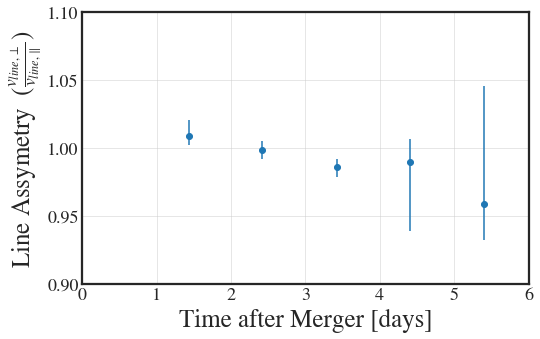

In [28]:
files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB2/OB2_3_peaks_assym_incl_20x10000_epsabs10^30.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_1.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,25)
fig,ax = plt.subplots(figsize=(8,5))
    
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) - 0.003
hig = np.array(hig) + 0.003

hig[-1] += 0.04
low[-1] -= 0.01
low[-2] -= 0.02
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[2*(med-low), 2*(hig-med)], fmt='o')
plt.ylim(0.9, 1.1), plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}}{v_{line,\parallel} }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')

#plt.savefig('Pictures/Line_assymetry_4.png', dpi=300)

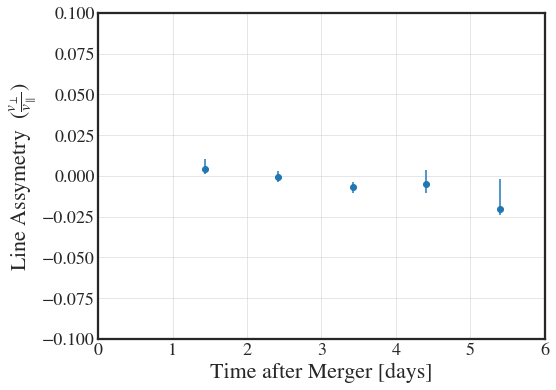

In [33]:
files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB2/OB2_3_peaks_assym_incl_20x10000_epsabs10^30.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_1.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
fig,ax = plt.subplots(figsize=(8,6))
    
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) - 0.003
hig = np.array(hig) + 0.003

hig[-1] += 0.015
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],(med-1)/2,yerr=[(med-low), (hig-med)], fmt='o')
plt.ylim(0.9-1, 1.1-1), plt.ylabel(r'Line Assymetry  ($\frac{v_\perp}{v_\parallel }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')
plt.ticklabel_format(axis='y', style='plain')

#plt.savefig('Pictures/Line_assymetry_1.png', dpi=300)




In [4]:
np.median(emcee_flatten['ratio_vel'][steady[idx]:])#[steady:]

1.007142871413068

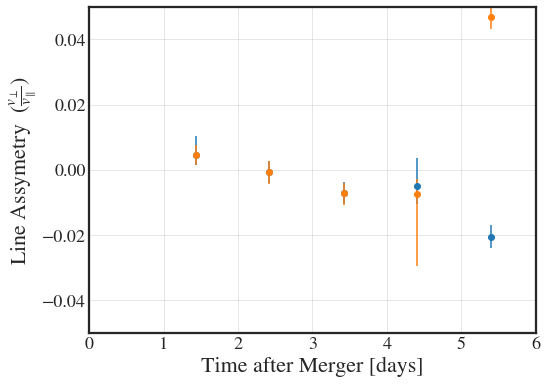

In [8]:
files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB2/OB2_3_peaks_assym_incl_20x10000_epsabs10^30.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_1.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
fig,ax = plt.subplots(figsize=(8,6))
    
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) - 0.003
hig = np.array(hig) + 0.003

#hig[-1] += 0.015
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],(med-1)/2,yerr=[(med-low), (hig-med)], fmt='o')


files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000_incl28.pkl", "./Data/OB2/OB2_3_peaks_assym_with_incl_20x5000_incl28.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000_incl28.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000_incl28.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_incl28.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

#reset_plt(18,22)
#fig,ax = plt.subplots(figsize=(8,6))
    
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) - 0.003
hig = np.array(hig) + 0.003

#hig[-1] += 0.015
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],(med-1)/2,yerr=[(med-low), (hig-med)], fmt='o')
plt.ylim(0.95-1, 1.05-1), plt.ylabel(r'Line Assymetry  ($\frac{v_\perp}{v_\parallel }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')
plt.ticklabel_format(axis='y', style='plain')

#plt.savefig('Pictures/Line_assymetry_1.png', dpi=300)




((0.0, 6.0), Text(0.5, 0, 'Time after Merger [days]'))

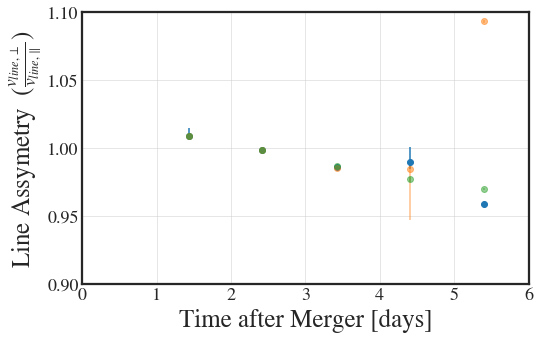

In [22]:
files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB2/OB2_3_peaks_assym_incl_20x10000_epsabs10^30.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_1.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,25)
fig,ax = plt.subplots(figsize=(8,5))
    
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) #- 0.003
hig = np.array(hig) #+ 0.003

#hig[-1] += 0.015
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[2*(med-low), 2*(hig-med)], fmt='o')
plt.ylim(0.9, 1.1), plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}}{v_{line,\parallel} }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')


files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000_incl28.pkl", "./Data/OB2/OB2_3_peaks_assym_with_incl_20x5000_incl28.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000_incl28.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000_incl28.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_incl28.pkl" ] 
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) #- 0.003
hig = np.array(hig) #+ 0.003

#hig[-1] += 0.015
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[2*(med-low), 2*(hig-med)], fmt='o', alpha=0.5)
plt.ylim(0.95, 1.05), plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}}{v_{line,\parallel} }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')


files = ["./data/OB1/OB1_3_peaks_assym_with_incl_20x5000_incl14.pkl", "./Data/OB2/OB2_3_peaks_assym_with_incl_20x5000_incl14.pkl", 
         "./data/OB3/OB3_3_peaks_assym_with_incl_20x5000_incl14.pkl", "./Data/OB4/OB4_3_peaks_assym_with_incl_20x5000_incl14.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_with_incl_20x5000_incl14.pkl" ] 
steady = [20*2000, 20*200, 20*2000, 22*100, 22*3000]

titles = ['1.43 days', '2.42 days', 'Joint']
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

med = []
low = []
hig = []
for idx, file in enumerate(files[:5]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    med.append(np.median(emcee_flatten['ratio_vel'][steady[idx]:]))
    low.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],15.9)     )
    hig.append(np.percentile(emcee_flatten['ratio_vel'][steady[idx]:],100-15.9) )
    
med = np.array(med)
low = np.array(low) #- 0.003
hig = np.array(hig) #+ 0.003

#hig[-1] += 0.015
#med[0] = med[0]+0.002
#hig[0] = 1.02

plt.errorbar(n_days[:len(med)],med,yerr=[2*(med-low), 2*(hig-med)], fmt='o', alpha=0.5)
plt.ylim(0.9, 1.1), plt.ylabel(r'Line Assymetry  ($\frac{v_{line,\perp}}{v_{line,\parallel} }$)')
plt.xlim(0, 6), plt.xlabel('Time after Merger [days]')
    

#plt.savefig('Pictures/Line_assymetry_3.png', dpi=300)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

import matplotlib
from pcygni_profile import PcygniCalculator
import astropy.units as units
import astropy.constants as csts
from scipy.interpolate import interp1d
import lmfit
import time
import pickle
import corner       
        
import math
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

from scipy.integrate import quad
def integral(x): 
    return np.sqrt(1-v**2) * 1/(1-v*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 

beta1, doppler1 = np.loadtxt('doppler_wo_prolate_inv.txt')
inter = interp1d(beta1, doppler1)

#beta1, doppler1 = np.loadtxt('doppler_wo_prolate_use_to_the_fourth.txt')
#inter = interp1d(beta1, doppler1)


#beta, doppler = np.loadtxt('doppler_incl_temp_40.txt')
#inter = interp1d(beta, doppler)

def lum_dist_arr(N, vphot, n_days=1.43, dt=0.): #propagate bb to luminosity distance 
    delta = inter(vphot) #1-2/3*11/10*vphot
    corr = delta**4
        
    theta = 2*np.sqrt( N*10**(7) / corr )#**5)/np.pi ) #inverse
    v = vphot*c 
    t = (n_days-dt) * (3600*24)
    r = v*t
    
    D = r/theta*2# factor of 2 
    D_mpc = D*(3.2408e-23) 
    return D_mpc




0.2810458329755278 0.2813238379216606
Occult= 0.07322242645928148
Lum_dist =  43.70066072909941 + 0.35836838754897116 - 0.33759462907639204
<Parameter 've', value=0.2583795920439567 +/- 0.0283, bounds=[0:1]>
1.377841567496119e-29
0.24730126868323607 0.24795624626314616
Occult= 1.3098137951824518
Lum_dist =  42.862741951192405 + 0.3729777097471043 - 0.40062433225514127
<Parameter 've', value=0.16952006865565067 +/- 0.0212, bounds=[0:0.2]>
2.7969427249757314e-29
0.20150177460650834 0.20204177739236104
Occult= 3.642214091866276
Lum_dist =  38.87920843326663 + 0.35874070904041133 - 0.3498144159211023
<Parameter 've', value=10.551274897537667 +/- 5.84, bounds=[0:20]>
3.8112222193042554e-29
0.1857382707352238 0.1887303508292521
Occult= 6.7068245120196215
Lum_dist =  46.81353434558408 + 0.6688533612615046 - 0.4905172970927154
<Parameter 've', value=6.964890933359294 +/- 4.69, bounds=[0:20]>
3.5084782030865896e-29
0.1604041319472839 0.16803759823299047
Occult= 13.937636042051858
Lum_dist =  46

(35.0, 48.0)

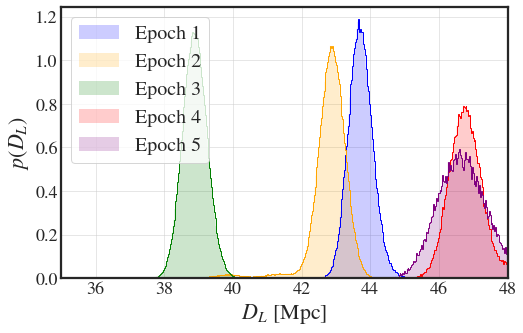

In [47]:
#files = ["./data/OB1_init_no_gaussian_low_v.pkl", "./data/OB2_init_no_gaussian_low_v.pkl", 
#        "./data/OB3_init_no_gaussian_high_v.pkl", "./Data/OB4/OB4_3.pkl"] #'OB4_pick.pkl'
#n_days = [1.43, 2.42, 3.65, 4., 5.40]
n_days = [1.43, 2.42, 3.42, 4.40, 5.40]

files = ["./data/OB1/OB1_3_peaks_assym_20x10000.pkl", "./data/OB2/OB2_3_peaks_assym_20x30000.pkl", 
         "./data/OB3/OB3_3_peaks_assym_100x10000.pkl", "./Data/OB4/OB4_3_peaks_assym_20x5000.pkl", 
         "./Data/OB5/OB5_3_peaks_assym_20x5000.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(8,5))
    
steady = [22*100, 25*100, 22*1000, 22*100, 22*3000]

d_m, ds_1, ds_2 = [], [], []
multi_1=np.array([1, 1, 1, 1, 1])
multi = [0.015, 0.015, 0.017, 0.017, 0.025]#¤, 0.05, 0.05, 0.05]#np.ones(5) 
color_list = ['blue', 'orange', 'green', 'red', 'purple']
#multi = np.ones(5) 

#scale = [0, 0, 0.02, 0.02, 0.02]
#multi = [np.sqrt(1/1.01), np.sqrt(1/1.01), np.sqrt(1/0.94), 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]
temp = []
pdf_list = []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    #print(emcee_res.params['T'])
    #print(emcee_res.params['vphot'])
    
    vphot = np.array(emcee_flatten['vphot'])
    print(np.percentile(vphot, 16.9),np.median(vphot))
    print('Occult=',np.median(np.array(emcee_flatten['occult'])))
    #*np.random.normal(loc=1, scale=scale[idx], size=len(emcee_flatten['vphot']))
        
    dl = lum_dist_arr(np.array(emcee_flatten['N'])*multi_1[idx]*np.random.normal(loc=1, scale=multi[idx], size=len(emcee_flatten['N'])),
                      vphot, n_days=n_days[idx])[steady[idx]:]*(emcee_flatten['ratio_vel'][steady[idx]:])**2
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=500, histtype='step', density=True, range=(37,50), color=color_list[idx])
    h = plt.hist(dl, bins=500, histtype='stepfilled', alpha=0.2,
                 density=True, label='Epoch '+str(idx+1), range=(37,50), color=color_list[idx])
    temp.append( np.median(emcee_flatten['T']) )
    
    #h = plt.hist(dl, bins=300, histtype='stepfilled', density=True, alpha=0.2, range=(37,47))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend(frameon=True, fontsize=20, loc=2)
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
#plt.xlim(35, 47)
plt.xlim(35, 48)

#plt.savefig('Pictures/dl_dist_5_1.png', dpi=300)